# Домашняя работа №1

**Срок сдачи:** 9 октября 2017, 23:59 <br\>

При отправлении ДЗ в Dropbox указывайте фамилию в названии файла: <br\>
** IDA<Номер группы>HW1<Фамилия>.ipynb ** - например ** IDA1HW1Panov.ipynb **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('titanium.csv')
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [2]:
from sklearn.preprocessing import StandardScaler

df2 = StandardScaler().fit_transform(df)

In [14]:
df3 = pd.DataFrame(data=df2)
df3.head()

,0,1
0,-1.697056,-0.432657
1,-1.626346,-0.491928
2,-1.555635,-0.448822
3,-1.484924,-0.419187
4,-1.414214,-0.411104


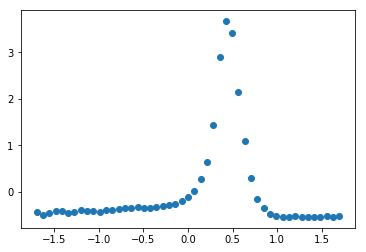

In [12]:
plt.scatter(df3[0], df3[1])

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df3[0], df3[1], test_size=0.33)
X_train

14   -0.707107
48    1.697056
44    1.414214
46    1.555635
13   -0.777817
37    0.919239
45    1.484924
22   -0.141421
3    -1.484924
40    1.131371
7    -1.202082
26    0.141421
31    0.494975
42    1.272792
43    1.343503
12   -0.848528
8    -1.131371
15   -0.636396
28    0.282843
47    1.626346
6    -1.272792
1    -1.626346
10   -0.989949
9    -1.060660
19   -0.353553
32    0.565685
5    -1.343503
29    0.353553
33    0.636396
25    0.070711
24    0.000000
27    0.212132
Name: 0, dtype: float64

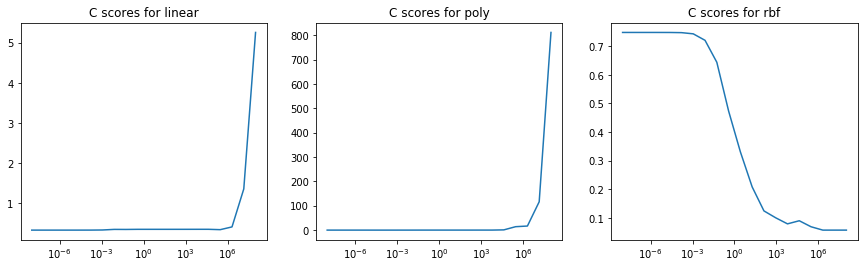

In [40]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax = ax.ravel()

i = 0
for params in [{'kernel': 'linear'}, 
               {'kernel': 'poly', 'degree': 3, 'gamma': 6, 'coef0': 1}, 
               {'kernel': 'rbf', 'gamma':  6, 'coef0': 1}]:
    X_train, X_test, y_train, y_test = train_test_split(df3[0], df3[1], test_size=0.33)
    scores = []
    C_range = np.logspace(-8, 8, num=20)
    for C in C_range:
        svr = SVR(C=C, epsilon=0.01, **params)
        svr.fit(X_train.values.reshape(-1, 1), y_train)
        score = mean_absolute_error(y_test, svr.predict(X_test.values.reshape(-1, 1)))
        scores.append(score)
    ax[i].set_title('C scores for '+params['kernel'])
    ax[i].plot(C_range, scores)
    ax[i].set_xscale("log", nonposx='clip')
    i += 1
        

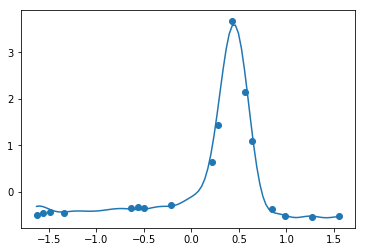

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df3[0], df3[1], test_size=0.33)
svr = SVR(C=10**4, epsilon=0.01, kernel= 'rbf', gamma= 6, coef0= 1)
svr.fit(X_train.values.reshape(-1, 1), y_train)

plt.scatter(X_test, y_test)
X_range = np.linspace(np.min(X_test), np.max(X_test), 100)
plt.plot(X_range, svr.predict(X_range.reshape(-1, 1)))

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [42]:
df1 = pd.read_csv('war_and_peace_en.txt', names = ['word'])
df1['label'] = pd.Series(np.ones(df1.shape[0]), dtype='int64')
df1.shape

(5044, 2)

In [43]:
df1.head()

,word,label
0,war,1
1,and,1
2,peace,1
3,leo,1
4,tolstoy,1


In [44]:
df2 = pd.read_csv('war_and_peace_es.txt', names = ['word'])
df2['label'] = np.zeros(df2.shape[0], dtype='int64')
df2.head()


,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


In [45]:
df = df1.append(df2)

df.shape

(11403, 2)

## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

RND_SEED = 1

X_train, X_test, y_train, y_test = train_test_split(df['word'], df['label'], test_size=0.2)
rr, CC = np.meshgrid([2,3,4,5], np.logspace(-10, 10, 10))

In [9]:
pipeline = Pipeline([('vector', CountVectorizer(analyzer ='char')), ('svc', SVC(kernel='linear'))])
pipeline.set_params(vector__ngram_range=(2, 2), svc__C=10)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vector', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        str...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [10]:
accuracy_score(y_test, pipeline.predict(X_test))

0.91100394563787812

In [ ]:
scores = []
for r, C in np.c_[rr.ravel(), CC.ravel()]:
    pipeline.set_params(vector__ngram_range=(int(r), int(r)), svc__C=C)
    pipeline.fit(X_train, y_train)
    score = accuracy_score(y_test, pipeline.predict(X_test))
    print('r={}, C={}: accuracy = {}'.format(r, C, score))
    scores.append(score)

r={}, C={}: accuracy = {} 2.0 1e-10 0.555019728189
r={}, C={}: accuracy = {} 3.0 1e-10 0.555019728189
r={}, C={}: accuracy = {} 4.0 1e-10 0.555019728189
r={}, C={}: accuracy = {} 5.0 1e-10 0.555019728189
r={}, C={}: accuracy = {} 2.0 1.6681005372e-08 0.555019728189
r={}, C={}: accuracy = {} 3.0 1.6681005372e-08 0.555019728189
r={}, C={}: accuracy = {} 4.0 1.6681005372e-08 0.555019728189
r={}, C={}: accuracy = {} 5.0 1.6681005372e-08 0.555019728189
r={}, C={}: accuracy = {} 2.0 2.78255940221e-06 0.555019728189
r={}, C={}: accuracy = {} 3.0 2.78255940221e-06 0.555019728189
r={}, C={}: accuracy = {} 4.0 2.78255940221e-06 0.555019728189
r={}, C={}: accuracy = {} 5.0 2.78255940221e-06 0.555019728189
r={}, C={}: accuracy = {} 2.0 0.000464158883361 0.555019728189
r={}, C={}: accuracy = {} 3.0 0.000464158883361 0.555019728189
r={}, C={}: accuracy = {} 4.0 0.000464158883361 0.555019728189
r={}, C={}: accuracy = {} 5.0 0.000464158883361 0.555019728189
r={}, C={}: accuracy = {} 2.0 0.077426368268

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [46]:
RND_SEED = 1

df5 = df.sample(n=df.shape[0]).reset_index(drop=True)
df5.head()

,word,label
0,pvlovna,0
1,occhiali,0
2,fete,1
3,vassilij,0
4,glad,1


In [47]:
df5 = df5[:1000]
X_train, X_test, y_train, y_test = train_test_split(df5.index, df5['label'], test_size=0.2)

In [48]:
X_train.shape

(800,)

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [54]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]

In [103]:
def string_kernel(U, V):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i, idx_U in enumerate(U):
        for j, idx_V in enumerate(V):
            G[i][j] = np.exp(-wfi_levenshtein(df.iloc[int(idx_U[0]), 0], df.iloc[int(idx_V[0]), 0])/10)
    return G

In [84]:
df.iloc[0,1]

1

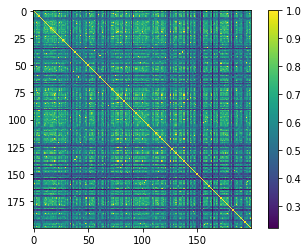

In [85]:
G = string_kernel(X_test.values.reshape(-1, 1), X_test.values.reshape(-1, 1))
plt.imshow(G)
plt.colorbar()
plt.show()

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [86]:
y_train.values

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0,

In [104]:
svc = SVC(kernel=string_kernel)
svc.fit(X_train.values.reshape(-1, 1), y_train.values)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [105]:
accuracy_score(y_test.values, svc.predict(X_test.values.reshape(-1, 1)))

0.5